In [77]:
import pandas, numpy

# Initializes data
data = pandas.read_csv('clint.csv').drop('Unnamed: 0', 1)
stop = open("stop-word-list.txt").read().splitlines()
data = data[data.message.notnull()]

In [78]:
# Cleans message data into a bag of words
messages = data.message.str.lower()
for p in ".,!?:;\"'-~|[]()/\\\n":
    messages = messages.str.replace(p,' ')
messages = messages.str.split()
data['words'] = messages.apply(lambda x: [w for w in x if w.isalpha() and w not in stop])
data['len'] = data.words.apply(len)
print('Number of messages: ' + str(len(data)))
print('Minimum number of words: ' + str(data.len.max()))
print('Maximum number of words: ' + str(data.len.min()))
print('Average number of words: ' + str(data.len.mean()))
print('Fewest words tweet: ' + data.message.loc[data.len.argmin()])
print('Most words tweet: ' + data.message.loc[data.len.argmax()])

Number of messages: 12461
Minimum number of words: 84
Maximum number of words: 0
Average number of words: 3.3850413289463126
Fewest words tweet: We ?
Most words tweet: TriHard C A N C E R TriHard C A N C E R TriHard C A N C E R TriHard C A N C E R TriHard C A N C E R TriHard C A N C E R TriHard C A N C E R TriHard C A N C E R TriHard C A N C E R TriHard C A N C E R TriHard C A N C E R TriHard C A N C E R TriHard C A N C E R TriHard C A N C E R


In [79]:
# Sentiment Analysis
pos = open('positive.txt').read().splitlines()
neg = open('negative.txt').read().splitlines()

data['pos'] = [len([w for w in t if w in pos]) for t in data.words]
data['neg'] = [len([w for w in t if w in neg]) for t in data.words]
data['comb'] = data.pos - data.neg

In [80]:
import datetime

data['minute'] = [datetime.datetime.fromtimestamp(x/1000.).strftime('%m/%d %H:%M') for x in data.timestamp]


04/17 02:24
pos     0.571429
neg     0.142857
comb    0.428571
Name: 04/17 02:24, dtype: float64
04/17 02:38
pos     0.314815
neg     0.740741
comb   -0.425926
Name: 04/17 02:38, dtype: float64


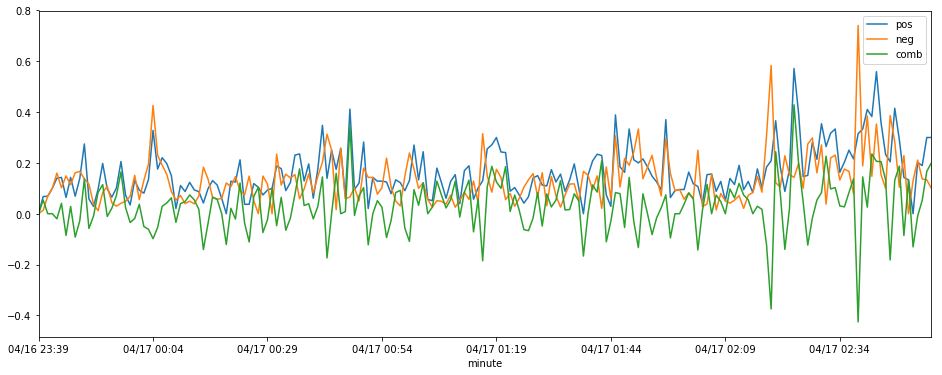

In [81]:
g = data.groupby('minute')
gt = g.mean().loc[:,['pos','neg','comb']]

print(gt.comb.argmax())
print(gt.loc[gt.comb.argmax()])

print(gt.comb.argmin())
print(gt.loc[gt.comb.argmin()])

%matplotlib inline
ax = gt.plot()
ax.figure.set_size_inches(16, 6, forward=True)

In [83]:
data[data.minute=='04/17 02:38']

,color,command,deleted,from,message,room,timestamp,video-offset,badges,bits,...,tmi-sent-ts,turbo,user-id,user-type,words,len,pos,neg,comb,minute
11771,#8A2BE2,NaN,False,mrdecimator,TearGlove i miss when Clint was good at video ...,clintstevens,1492411080268,10683268,NaN,NaN,...,1492411094666,False,21790720,NaN,"[tearglove, miss, clint, good, video, games, t...",7,1,0,1,04/17 02:38
11772,#03C46D,NaN,False,tokyoghoul23_,why is his room so dark,clintstevens,1492411080429,10683429,NaN,NaN,...,1492411094880,False,83712641,NaN,"[room, dark]",2,0,1,-1,04/17 02:38
11773,#CC004B,NaN,False,bradpittshair,Can I be a pleb guys,clintstevens,1492411080478,10683478,premium/1,NaN,...,1492411094940,False,120158706,NaN,"[pleb, guys]",2,0,0,0,04/17 02:38
11774,#8A2BE2,NaN,False,4eign,"@hayleydanger nothing, just keep doing what yo...",clintstevens,1492411081535,10684535,bits/100,NaN,...,1492411095899,False,71288609,NaN,"[just, doing, doing, good, job, guess, fly, la...",11,3,0,3,04/17 02:38
11775,#9ACD32,NaN,False,arg0ss,"Oh man FeelsBadMan , what's the uptime? i was ...",clintstevens,1492411082569,10685569,NaN,NaN,...,1492411096994,False,55589411,NaN,"[oh, man, feelsbadman, s, uptime, hoping, ongo...",8,0,0,0,04/17 02:38
11776,#008000,USERNOTICE,False,littlemac_94,"14 months baby, keep up the good streams :)",NaN,1492411082729,10685729,"subscriber/12,bits/100",NaN,...,1492411097207,False,113145893,NaN,"[months, baby, good, streams]",4,1,0,1,04/17 02:38
11777,NaN,NaN,False,therealllmikeross,what do u call a fat computer? Adele,clintstevens,1492411085208,10688208,NaN,NaN,...,1492411099587,False,113575750,NaN,"[u, fat, adele]",3,0,1,-1,04/17 02:38
11778,NaN,NaN,False,vibratingdonkeys,"@Clintstevens, I am real super sand lesbian!!!!",clintstevens,1492411088278,10691278,NaN,NaN,...,1492411102721,False,150294010,NaN,"[real, super, sand, lesbian]",4,2,0,2,04/17 02:38
11779,#FF4500,NaN,False,ndanilo,im cancer but thats ok,clintstevens,1492411089189,10692189,NaN,NaN,...,1492411103627,False,82450195,NaN,"[im, cancer, thats, ok]",4,0,1,-1,04/17 02:38
11781,#CC00A0,NaN,False,7zelda,twitch need to make a /pleb mode to mute these...,clintstevens,1492411092167,10695167,NaN,NaN,...,1492411106579,False,70001265,NaN,"[twitch, need, make, pleb, mode, mute, pesky, ...",8,0,1,-1,04/17 02:38


In [84]:
data.emotes

0                  {'88': [[0, 7]]}
1                  {'88': [[0, 7]]}
2                  {'88': [[0, 7]]}
3               {'30259': [[0, 6]]}
4                               NaN
5                               NaN
6                  {'88': [[0, 7]]}
7                               NaN
8                               NaN
9                               NaN
10       {'88': [[0, 7], [18, 25]]}
11                 {'88': [[0, 7]]}
12                              NaN
13                              NaN
14                              NaN
15           {'144687': [[17, 22]]}
16                 {'25': [[0, 4]]}
17                              NaN
18                              NaN
19           {'146956': [[18, 24]]}
20                 {'88': [[0, 7]]}
21                              NaN
22                 {'88': [[0, 7]]}
23                              NaN
24                              NaN
25                              NaN
26                              NaN
27           {'160404': [[10